실습에 해당하는 내용은 책 "혼자 공부하는 머신러닝+딥러닝"을 참고해서 작성했습니다.

# Ensemble

In [ ]:
# 랜덤 포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# return_train_score=True로 하여 훈련 세트에 대한 점수도 같이 반환(과대적합 파악에 용이)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
# 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
# 자체적으로 모델을 평가하는 oob 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [ ]:
# 엑스트라 트리
# 랜덤포레스트와 유사하나 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용함
# 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 뿐할함
# 특성을 무작위로 분할한다면 성능이 낮아이지만 많은 트리를 앙상블 하기에 오버피팅을 막고 검증 세트의 점수를 높이는 효과가 있음
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
# 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [ ]:
# 그레디언트 부스팅
# 깊이가 얕은 결정트리를 사용하기에 오버피팅에 강하고 높은 일반화 성능
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
# 학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상됨
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
# 특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [ ]:
# 그레디언트 부스팅의 속도와 성능을 개선한 히스토그램 기반 그레디언트 부스팅
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾음
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
# 특성 중요도 출력
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
# XGBoost
# tree_method 매개변수를 'hist'로 지정하여 히스토그램 기반 그레디언트 부스팅 가용
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


## 과제1

#과제

1. 하단 셀에서 lightGBM 구현하기 (상단 Ensemble 셀 모두 실행 후 진행)
2. 그리드 서치, 랜덤 서치 각각 어떤 상황에서 효율적인지 설명
3. 다른 데이터셋으로 Decision Tree regression task 진행해보기
  - 원하는 데이터셋을 사용해도 괜찮고, 올려둔 bike_data 사용해도 괜찮음
  - 직접 구현해보는 것이 어렵다면 'bike sharing data decision tree regressor' 키워드로 검색 후 참고


In [ ]:
# 과제 1: lightGBM 구현하기 (ensemble 쪽 코드들 전부 실행한 다음에 과제 진행하기.)
from lightgbm import LGBMClassifier
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day = pd.read_csv('/content/drive/MyDrive/assignment/day.csv')
hour = pd.read_csv('/content/drive/MyDrive/assignment/hour.csv')

day.rename(columns = {'instant':'number',
                      'yr' : 'year',
                      'mnth' : 'month',
                      'hum' : 'humidity',
                      'cnt' : 'count',
                      'windspeed' : 'windSpeed',
                      'weathersit' : 'weather',
                      'dteday' : 'date'}, inplace = True)
day.head()

,number,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windSpeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour.rename(columns = {'instant':'number',
                       'yr' : 'year',
                       'mnth' : 'month',
                       'hr' : 'hour',
                       'hum' : 'humidity',
                       'cnt' : 'count',
                       'windspeed' : 'windSpeed',
                       'weathersit' : 'weather',
                       'dteday' : 'date'}, inplace = True)
hour.head(24)

,number,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windSpeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
# Prepare data for 'day' dataset
X_day = day.drop(columns=['number', 'date', 'casual', 'registered', 'count'])
y_day = day['count']

# Prepare data for 'hour' dataset
X_hour = hour.drop(columns=['number', 'date', 'casual', 'registered', 'count'])
y_hour = hour['count']

# Split the data into train and test sets
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day, y_day, test_size=0.25, random_state=42)

X_hour_train, X_hour_test, y_hour_train, y_hour_test = train_test_split(X_hour, y_hour, test_size=0.25, random_state=42)

In [ ]:
def lgbm_model(train_X, train_y, test_X, test_y, search_type='grid'):
    estimator = lgb.LGBMRegressor()

    if search_type == 'grid':
        param_grid = {
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [20, 40, 100, 200],
            'num_leaves': [30, 50, 80, 100],
            'min_data_in_leaf': [10, 30, 50, 100]
        }
        grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
        grid_search.fit(train_X, train_y)
        predict_y = grid_search.predict(test_X)
        model = grid_search.best_estimator_
    elif search_type == 'random':
        param_dist = {
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [20, 40, 100, 200],
            'num_leaves': [30, 50, 80, 100],
            'min_data_in_leaf': [10, 30, 50, 100]
        }
        n_iter_search = 20
        random_search = RandomizedSearchCV(estimator, param_dist, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, n_iter=n_iter_search)
        random_search.fit(train_X, train_y)
        predict_y = random_search.predict(test_X)
        model = random_search.best_estimator_

    mse = mean_squared_error(test_y, predict_y)
    print(f"{search_type.title()} search MSE: {mse}")

    return model


In [ ]:
#lgbm_day_grid = lgbm_model(X_day_train, y_day_train, X_day_test, y_day_test, search_type='grid')
#lgbm_hour_grid = lgbm_model(X_hour_train, y_hour_train, X_hour_test, y_hour_test, search_type='grid')

lgbm_day_random = lgbm_model(X_day_train, y_day_train, X_day_test, y_day_test, search_type='random')
lgbm_hour_random = lgbm_model(X_hour_train, y_hour_train, X_hour_test, y_hour_test, search_type='random')

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Random search MSE: 401507.93237864313
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Random search MSE: 1459.5564392737995


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Grid search MSE: 406719.7724626566
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Grid search MSE: 1422.2696383256193

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Random search MSE: 401507.93237864313
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Random search MSE: 1425.783143803921

NameError: ignored

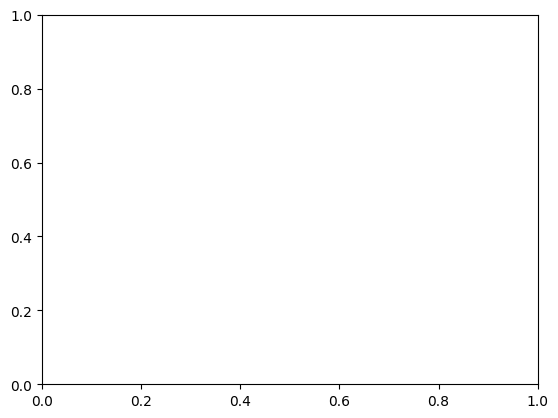

In [ ]:
'''
# Constructing train dataset
X = train_df_new
y= y.total_count.values.reshape(-1,1)

# Constructing test dataset
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
print(X.shape,y.shape)

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

fig,ax = plt.subplots()

sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")
'''

In [ ]:
'''
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
'''

In [ ]:
'''
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))
'''

In [ ]:
'''
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
'''

##과제2
답: Random search는 계산비용이 낮아야하거나 파라미터 공간을 확인하고 싶을 때 사용한다. Grid search는 파라미터를 균일하게 파악하기 때문에 지점과 지점 사이에 optimal point가 있을 때 이를 못 찾을 수 있다. 이에 반해 Random search는 전체 파라미터 공간을 잘 찾을 가능성이 있다.
모델의 iteration 수가 클수록 random search가 더 나은 성능을 낼 수 있지만, iteration 수가 작을수록 grid search가 나을 수 있다.

## 과제3